In [387]:
# Basic Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time 
import random
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

## Combining the 2 datasets together and cleaning it

In [388]:
AMD_data = pd.read_csv('AMD_cleaned.csv')
AMD_data.head()

,Unnamed: 0,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),...,Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,0,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,DDR2,64,...,667.0,40.0,292.0,4.9,59.0,19.0,2.6,5.2,128.0,80
1,1,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,...,500.0,40.0,292.0,4.9,59.0,25.0,2.6,5.2,128.0,80
2,2,AMD,TSMC,TeraScale 2,1,2009,104.0,1024.0,GDDR3,64,...,800.0,40.0,292.0,4.9,59.0,25.0,2.6,5.2,128.0,80
3,3,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,...,500.0,40.0,292.0,4.9,59.0,25.0,2.6,5.2,128.0,80
4,4,AMD,TSMC,TeraScale 2,1,2009,352.0,1024.0,DDR2,128,...,500.0,40.0,627.0,6.0,104.0,39.0,4.4,8.8,256.0,400


In [389]:
Nvidia_data = pd.read_csv('Nvidia_cleaned.csv')
Nvidia_data.head()

,Unnamed: 0,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),...,Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,0,Nvidia,UMC,Tesla,1,2006,20.8,256.0,DDR2,64,...,400.0,65.0,210.0,2.4,86.0,40.0,2.160,2.16,16.0,8
1,1,Nvidia,TSMC,Tesla,1,2006,117.5,512.0,DDR2,128,...,504.0,55.0,314.0,2.6,121.0,50.0,5.904,11.81,32.0,32
2,2,Nvidia,TSMC,Tesla,1,2006,89.6,512.0,GDDR3,128,...,800.0,55.0,314.0,2.6,121.0,50.0,4.400,8.80,32.0,32
3,3,Nvidia,TSMC,Tesla,1,2006,120.0,512.0,DDR2,192,...,500.0,55.0,505.0,2.6,196.0,105.0,6.000,12.00,64.0,64
4,4,Nvidia,TSMC,Tesla,1,2006,144.0,512.0,GDDR3,192,...,792.0,55.0,505.0,2.6,196.0,105.0,7.200,14.40,64.0,64


In [390]:
Nvidia_data.drop(columns = ['Unnamed: 0'])

,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),GPU clock (MHz),Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,Nvidia,UMC,Tesla,1,2006,20.8,256.0,DDR2,64,540.0,400.0,65.0,210.0,2.4,86.0,40.0,2.160,2.16,16.0,8
1,Nvidia,TSMC,Tesla,1,2006,117.5,512.0,DDR2,128,738.0,504.0,55.0,314.0,2.6,121.0,50.0,5.904,11.81,32.0,32
2,Nvidia,TSMC,Tesla,1,2006,89.6,512.0,GDDR3,128,550.0,800.0,55.0,314.0,2.6,121.0,50.0,4.400,8.80,32.0,32
3,Nvidia,TSMC,Tesla,1,2006,120.0,512.0,DDR2,192,500.0,500.0,55.0,505.0,2.6,196.0,105.0,6.000,12.00,64.0,64
4,Nvidia,TSMC,Tesla,1,2006,144.0,512.0,GDDR3,192,600.0,792.0,55.0,505.0,2.6,196.0,105.0,7.200,14.40,64.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Nvidia,TSMC,Ada Lovelace,13,2022,67580.0,20480.0,GDDR6X,320,2100.0,1325.0,5.0,76300.0,125.3,609.0,800.0,345.600,1056.00,98304.0,18432
275,Nvidia,TSMC,Ada Lovelace,13,2022,73540.0,24576.0,GDDR6X,384,2280.0,1313.0,5.0,76300.0,125.3,609.0,800.0,443.500,1149.00,98304.0,18432
276,Nvidia,TSMC,Ada Lovelace,13,2022,82580.0,24576.0,GDDR6X,384,2235.0,1313.0,5.0,76300.0,125.3,609.0,800.0,443.500,1290.00,98304.0,18432
277,Nvidia,TSMC,Ada Lovelace,13,2022,93240.0,24576.0,GDDR6X,384,2325.0,1500.0,5.0,76300.0,125.3,609.0,800.0,492.500,1457.00,98304.0,18432


In [391]:
AMD_data.drop(columns = ['Unnamed: 0'])

,Manufacturer,Foundry,Architecture,Arbitrary Gen,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Memory Type,Bus Width (bits),GPU clock (MHz),Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),Pixel Rate (GPixel/s),Texture Rate (GTexel/s),L2 Cache (KB),Shading Units
0,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,DDR2,64,650.0,667.0,40.0,292.0,4.9,59.0,19.0,2.60,5.2,128.0,80
1,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,650.0,500.0,40.0,292.0,4.9,59.0,25.0,2.60,5.2,128.0,80
2,AMD,TSMC,TeraScale 2,1,2009,104.0,1024.0,GDDR3,64,650.0,800.0,40.0,292.0,4.9,59.0,25.0,2.60,5.2,128.0,80
3,AMD,TSMC,TeraScale 2,1,2009,104.0,512.0,GDDR3,64,650.0,500.0,40.0,292.0,4.9,59.0,25.0,2.60,5.2,128.0,80
4,AMD,TSMC,TeraScale 2,1,2009,352.0,1024.0,DDR2,128,550.0,500.0,40.0,627.0,6.0,104.0,39.0,4.40,8.8,256.0,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,AMD,GlobalFoundries,GCN 5.0,7,2017,10540.0,8192.0,HBM2,2048,1156.0,800.0,14.0,12500.0,25.3,495.0,375.0,94.14,329.5,4096.0,4096
214,AMD,GlobalFoundries,GCN 5.0,7,2017,12660.0,8192.0,HBM2,2048,1247.0,800.0,14.0,12500.0,25.3,495.0,375.0,98.94,395.8,4096.0,4096
215,AMD,GlobalFoundries,GCN 5.0,7,2017,12660.0,8192.0,HBM2,2048,1247.0,945.0,14.0,12500.0,25.3,495.0,375.0,98.94,395.8,4096.0,4096
216,AMD,GlobalFoundries,GCN 5.0,7,2017,12660.0,8192.0,HBM2,2048,1247.0,945.0,14.0,12500.0,25.3,495.0,375.0,98.94,395.8,4096.0,4096


In [392]:
frames = [AMD_data, Nvidia_data]
combined_data = pd.concat(frames)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 278
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               497 non-null    int64  
 1   Manufacturer             497 non-null    object 
 2   Foundry                  497 non-null    object 
 3   Architecture             497 non-null    object 
 4   Arbitrary Gen            497 non-null    int64  
 5   Gen Year                 497 non-null    int64  
 6   FP32 (float) in GFLOPS   497 non-null    float64
 7   Memory Size (MB)         497 non-null    float64
 8   Memory Type              497 non-null    object 
 9   Bus Width (bits)         497 non-null    int64  
 10  GPU clock (MHz)          497 non-null    float64
 11  Memory clock (MHz)       497 non-null    float64
 12  Process Size (nm)        497 non-null    float64
 13  Transistors (millions)   497 non-null    float64
 14  Density (M/mm²)          497 no

In [393]:
combined_data = combined_data.dropna(subset=['Max. TDP (W)'])
combined_data = combined_data.drop(columns = ['Unnamed: 0', 'Arbitrary Gen', 'Pixel Rate (GPixel/s)', 'Texture Rate (GTexel/s)', 'Shading Units'])
#dropping Arbitrary Gen as both manufacturers have different architectures
#dropping Pixel Rate and Texture Rate as both of these are also a measure of performance
#dropping Shading Units as it is not a technical component
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 278
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            496 non-null    object 
 1   Foundry                 496 non-null    object 
 2   Architecture            496 non-null    object 
 3   Gen Year                496 non-null    int64  
 4   FP32 (float) in GFLOPS  496 non-null    float64
 5   Memory Size (MB)        496 non-null    float64
 6   Memory Type             496 non-null    object 
 7   Bus Width (bits)        496 non-null    int64  
 8   GPU clock (MHz)         496 non-null    float64
 9   Memory clock (MHz)      496 non-null    float64
 10  Process Size (nm)       496 non-null    float64
 11  Transistors (millions)  496 non-null    float64
 12  Density (M/mm²)         496 non-null    float64
 13  Die Size (mm²)          496 non-null    float64
 14  Max. TDP (W)            496 non-null    float64

# Exploratory Data Analysis

In [394]:
combined_data.describe()

,Gen Year,FP32 (float) in GFLOPS,Memory Size (MB),Bus Width (bits),GPU clock (MHz),Memory clock (MHz),Process Size (nm),Transistors (millions),Density (M/mm²),Die Size (mm²),Max. TDP (W),L2 Cache (KB)
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,2013.141129,6236.322319,4310.967742,270.129032,1042.449597,1259.096774,27.403226,6879.590726,21.179032,263.891129,212.852823,3564.225806
std,4.413048,12949.432566,5471.245642,492.842196,430.844345,478.197570,14.304577,11922.796974,26.470218,169.510240,187.870083,12611.472534
min,2006.000000,20.800000,128.000000,32.000000,475.000000,333.000000,5.000000,210.000000,2.100000,56.000000,19.000000,16.000000
25%,2010.000000,599.000000,1024.000000,128.000000,730.000000,900.000000,14.000000,950.000000,5.900000,118.000000,75.000000,256.000000
50%,2012.000000,1613.000000,2048.000000,192.000000,925.000000,1200.000000,28.000000,2800.000000,12.300000,232.000000,170.000000,512.000000
75%,2016.000000,5345.000000,6144.000000,256.000000,1257.000000,1502.000000,40.000000,6600.000000,24.400000,365.250000,290.000000,2048.000000
max,2022.000000,93240.000000,49152.000000,4096.000000,2505.000000,3000.000000,65.000000,76300.000000,125.300000,815.000000,900.000000,98304.000000


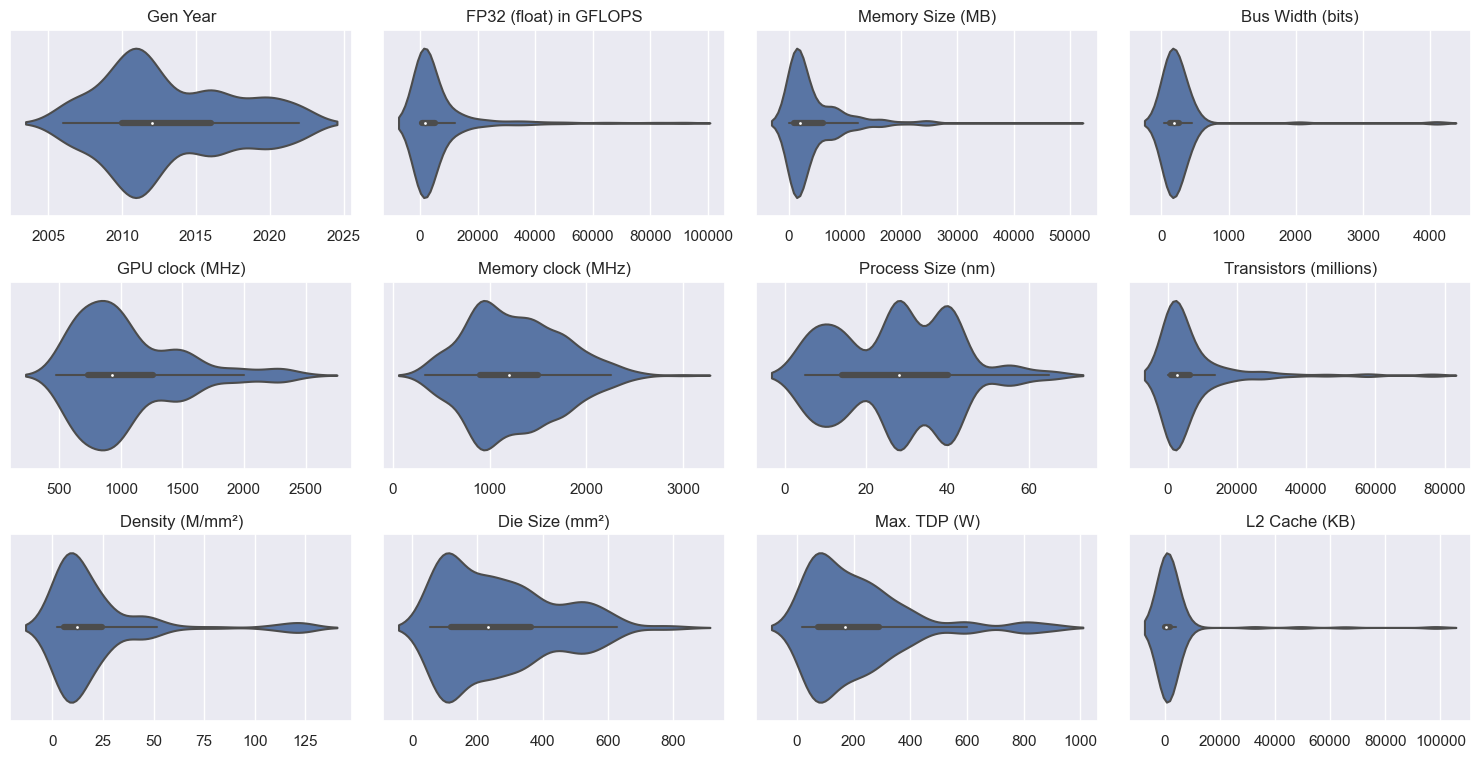

In [395]:
# Identify numerical columns
numerical_cols = combined_data.select_dtypes(include='number').columns

# Plot violin plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sb.violinplot(x=combined_data[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

### Comment for Violin Plot:
- majority shows a left skew, may need to normalise the dataset to better model the machine learning models.

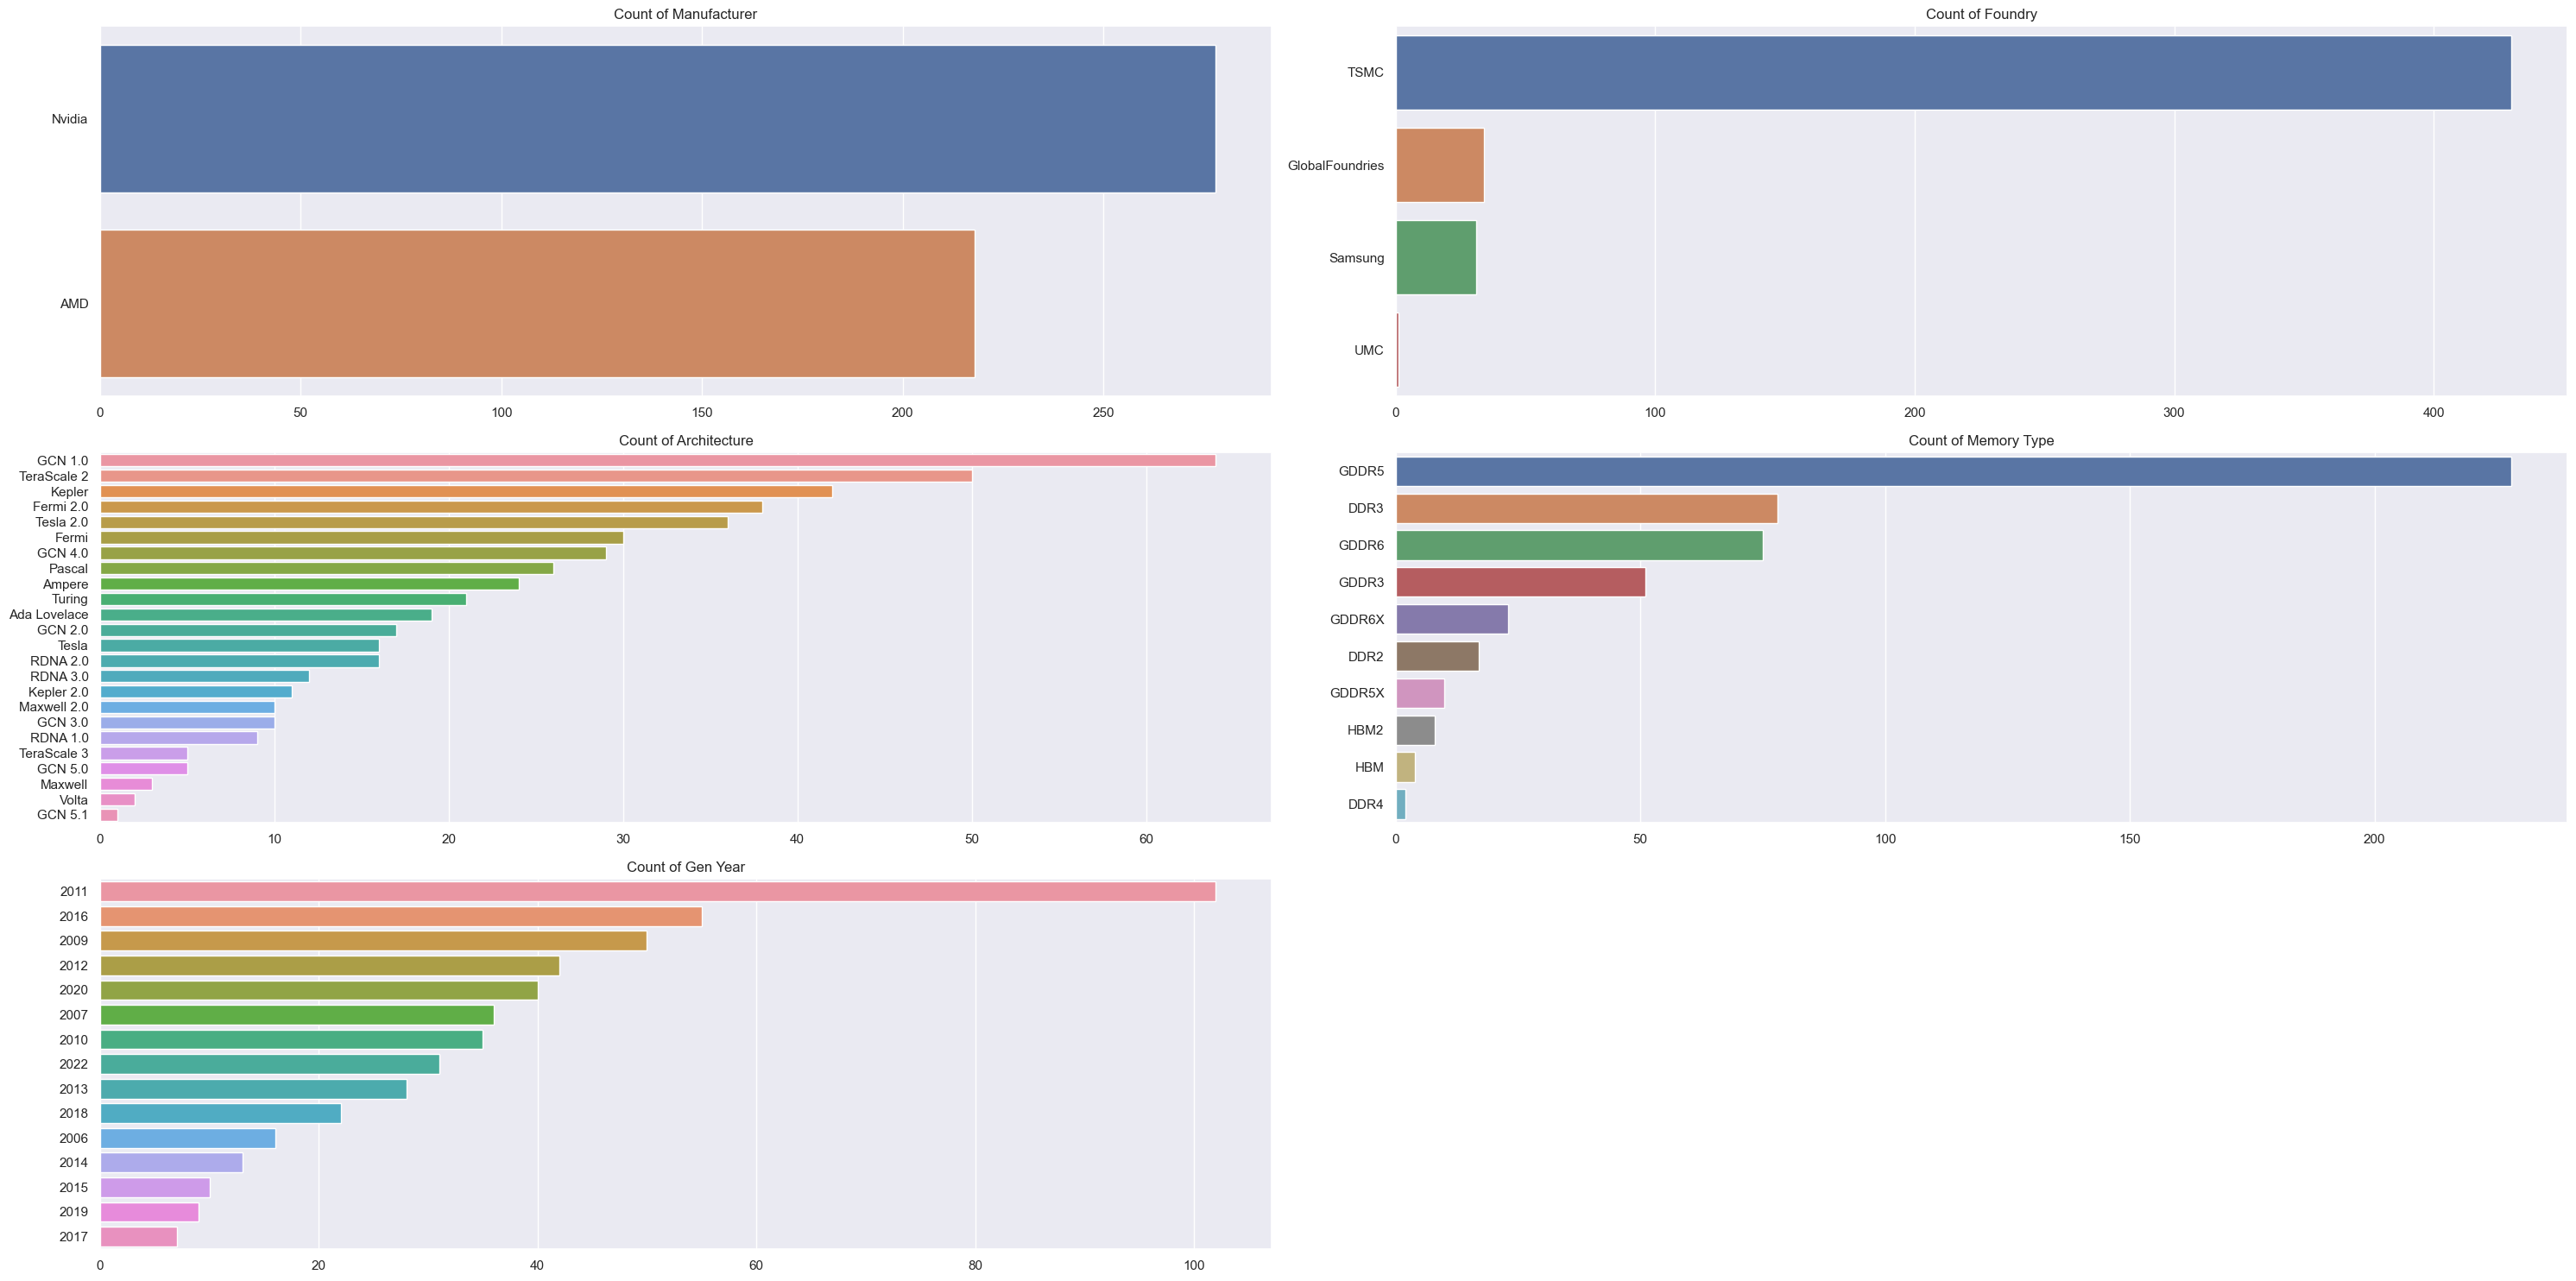

In [396]:
# Identify non-numerical (categorical) columns, including 'Gen Year'
categorical_cols = combined_data.select_dtypes(exclude='number').columns.tolist()
categorical_cols.append('Gen Year')  # Adding 'Gen Year' as it's a categorical representation of year

# Plot count plots for each categorical column
plt.figure(figsize=(30, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i + 1)
    sb.countplot(y=combined_data[col], order = combined_data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

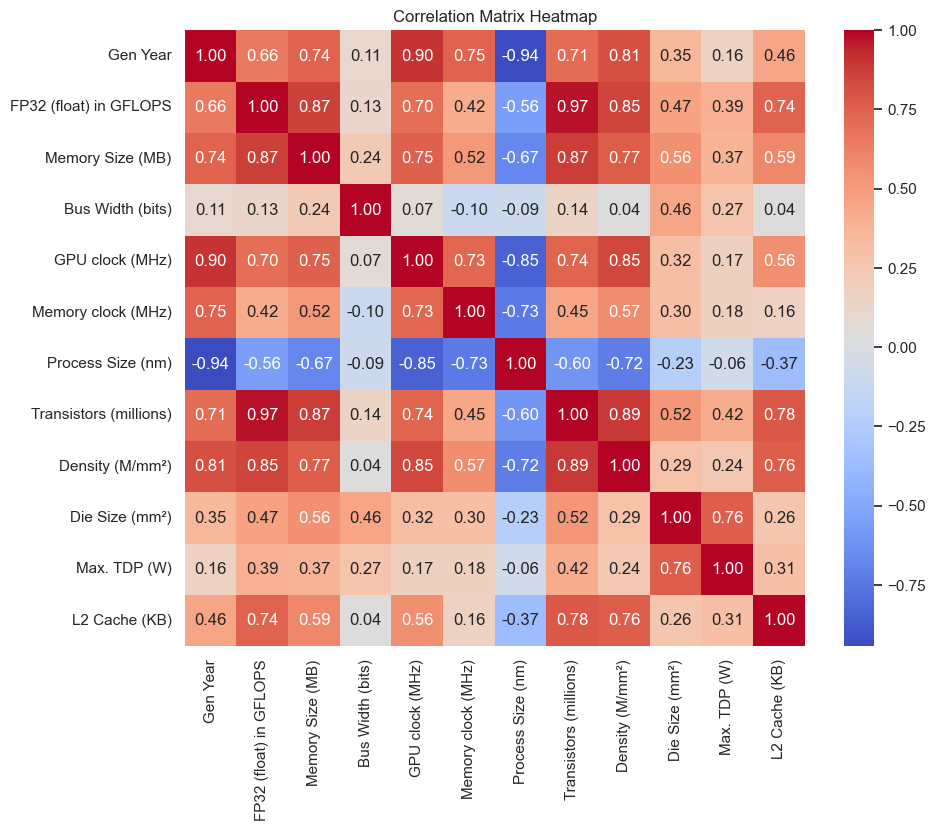

In [397]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(combined_data.corr(numeric_only = True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Comment for Correlation Matrix:

- A correlation of 1 (dark red) means there is a perfect positive correlation between the two variables, meaning as one variable increases, the other also increases.
- A correlation of -1 (dark blue) means there is a perfect negative correlation, meaning as one variable increases, the other decreases.
- A correlation of 0 (white) means there is no linear correlation between the two variables.

Some observations: 
1. FP32 (float) in GFLOPS shows strong positive correlations with Transistors. This suggests that GPUs with more Transistors tend to have higher computing power in GFLOPS.
2. Memory Size (MB) also has a strong positive correlation with FP32 (float) in GFLOPS, indicating that GPUs with more memory tend to have higher computing power.
3. Memory Clock (MHz) and Process Size (nm) have weaker correlations with most of the other variables. This may suggest that these characteristics do not linearly influence the other variables as strongly as some of the others do.
4. Process Size (nm) has a moderately negative correlation with many variables, such as FP32 (float) in GFLOPS, Transistors, and Texture Rate. Typically, a smaller process size is associated with a more advanced manufacturing process, allowing for more transistors in the same area and potentially more powerful GPUs, but this matrix indicates a potential trend towards less efficiency or other factors associated with smaller process sizes.
5. The diagonal, where the row and column represent the same variable, will always be 1 because a variable is always perfectly correlated with itself.

# Machine Learning

## 1. Random Forrest Regression

In [398]:
from sklearn.model_selection import train_test_split

# Dropping non-numeric and irrelevant columns
features_columns = combined_data.select_dtypes(include=[np.number]).columns.tolist()
features_columns.remove('FP32 (float) in GFLOPS')  # Remove the target variable from features

# Set the features and target
features = combined_data[features_columns]
target = combined_data['FP32 (float) in GFLOPS']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((396, 11), (100, 11), (396,), (100,))

In [399]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth = 4, random_state=42)  #using 100 individual decision trees
                                                                                    # and using max depth of 4

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on training and testing sets
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(train_rmse, train_r2, test_rmse, test_r2,'\n')

# Feature Importance
importances = rf_model.feature_importances_
importance_dict = dict(zip(features.columns, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

1237.7696173867073 0.9896641756887449 3009.064253421282 0.9623074854718783 

Feature Importances:
Transistors (millions): 0.9029
GPU clock (MHz): 0.0550
Memory Size (MB): 0.0198
Bus Width (bits): 0.0077
Memory clock (MHz): 0.0058
Density (M/mm²): 0.0054
Max. TDP (W): 0.0019
Die Size (mm²): 0.0007
Process Size (nm): 0.0004
L2 Cache (KB): 0.0004
Gen Year: 0.0001


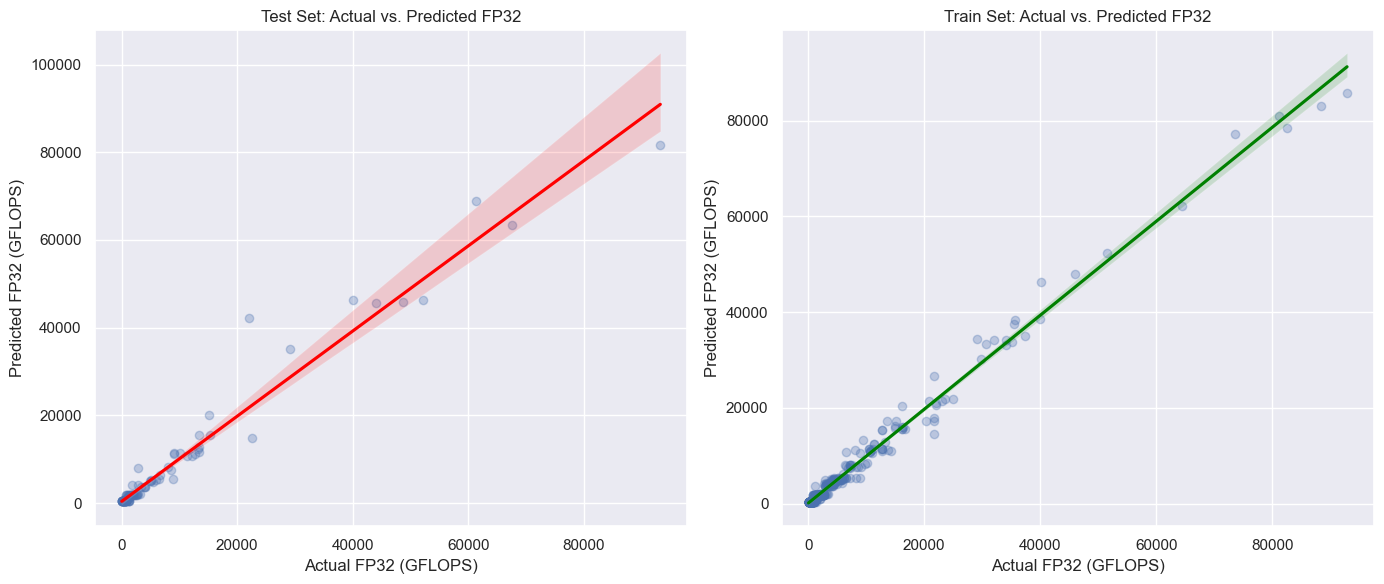

In [400]:
# Visualizing the results with a scatter plot and the line of best fit
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.regplot(x=y_test, y=test_predictions, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Test Set: Actual vs. Predicted FP32')
plt.xlabel('Actual FP32 (GFLOPS)')
plt.ylabel('Predicted FP32 (GFLOPS)')

plt.subplot(1, 2, 2)
sb.regplot(x=y_train, y=train_predictions, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Train Set: Actual vs. Predicted FP32')
plt.xlabel('Actual FP32 (GFLOPS)')
plt.ylabel('Predicted FP32 (GFLOPS)')

plt.tight_layout()
plt.show()

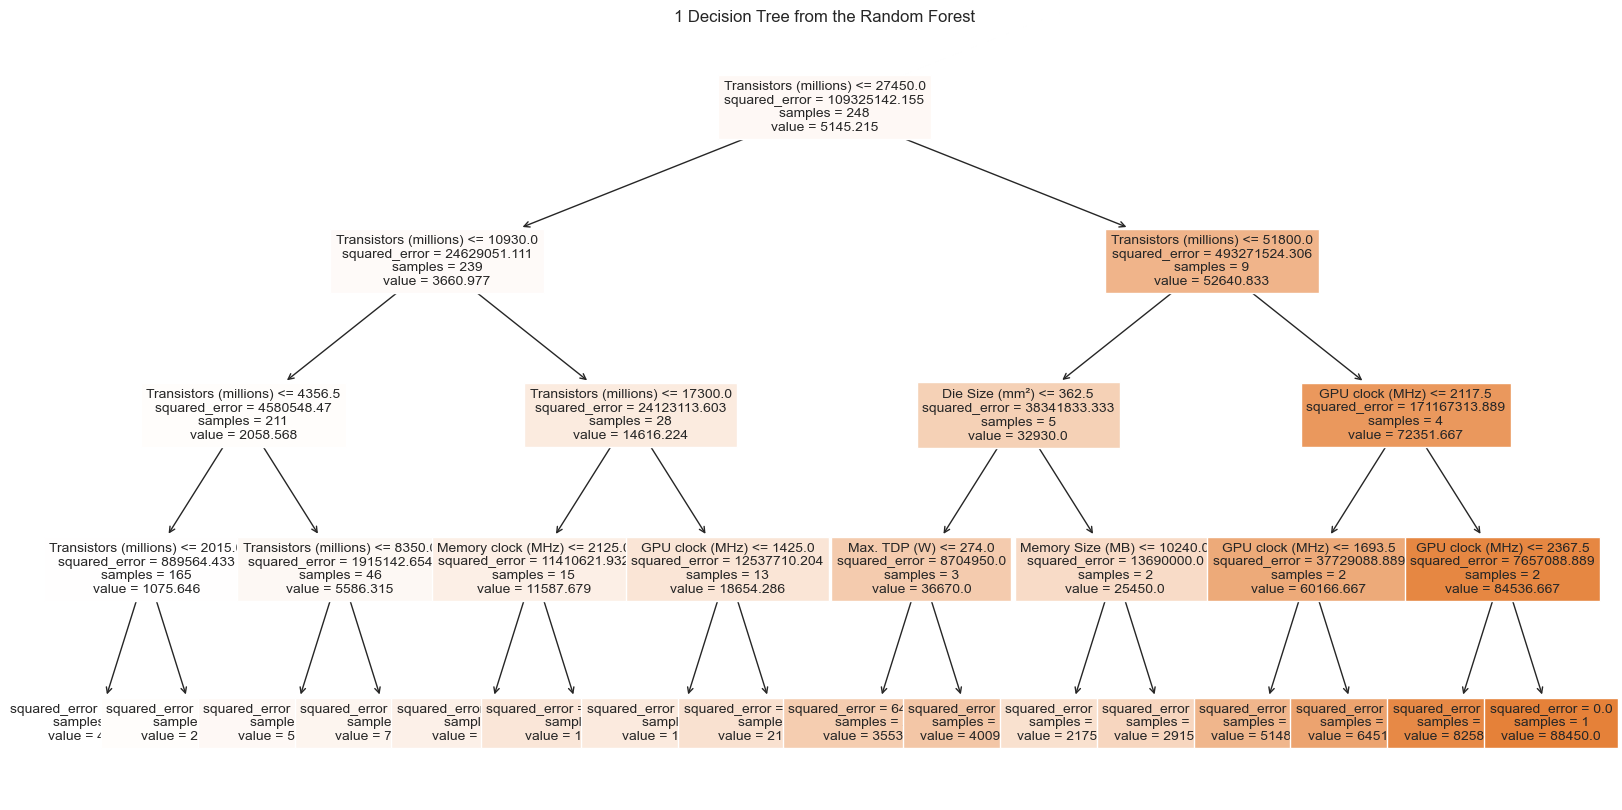

In [401]:
from sklearn.tree import plot_tree

# Convert feature names from Index to list
feature_names_list = X_train.columns.tolist()

single_tree = rf_model.estimators_[0]

# Visualize the tree again with corrected parameters
plt.figure(figsize=(20,10))
plot_tree(single_tree, 
          feature_names=feature_names_list, 
          filled=True, 
          max_depth=4,
          fontsize=10)
plt.title('1 Decision Tree from the Random Forest')
plt.show()

In [402]:
# using no max depth
# Create the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  #using 100 individual decision trees
                                                                     # and no max depth

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on training and testing sets
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print(train_rmse, train_r2, test_rmse, test_r2,'\n')

# Feature Importance
importances = rf_model.feature_importances_
importance_dict = dict(zip(features.columns, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

833.3212576091961 0.9953152070293788 2944.572337258075 0.9639058645658924 

Feature Importances:
Transistors (millions): 0.8934
GPU clock (MHz): 0.0575
Memory Size (MB): 0.0228
Bus Width (bits): 0.0073
Memory clock (MHz): 0.0071
Density (M/mm²): 0.0061
Max. TDP (W): 0.0033
Die Size (mm²): 0.0015
L2 Cache (KB): 0.0004
Gen Year: 0.0003
Process Size (nm): 0.0003


### comment for Random Forrest Regression:

Comparing the 2 goodness of fit:

Both models show high R² values on the training set, close to 0.99, indicating that they explain most of the variance in the data. The training performance of the unrestricted depth model is slightly better than that of the depth-limited model.

The test RMSE for both models is notably higher than the training RMSE, which is expected due to the model facing unseen data. However, the difference between the train and test RMSE is smaller in the model without a maximum depth, suggesting slightly better generalization. Both models achieve very high R² values on the test set, with the unrestricted model showing a marginal improvement, which suggests excellent generalization capabilities.

Further finetuning our model:

We can adjust other parameters, such as the number of trees (n_estimators), the number of features considered for splitting at each leaf node (max_features), or the minimum number of samples required at a leaf node (min_samples_leaf), which help in refining the model to achieve a better balance between bias and variance.

### Why Random Forrest Regression?

Handling Non-linear Relationships: GPUs' performance metrics can depend on a variety of factors in non-linear ways. Random Forest can handle these non-linear relationships more effectively than linear models because it constructs multiple decision trees that learn various aspects of the data.

Feature Interaction: Random Forest inherently considers interactions between features when splitting nodes in individual trees. This is beneficial for a dataset like ours, where GPU performance might be influenced by interactions between features such as memory size, GPU clock speed, and process technology.

Robustness to Overfitting: Despite being a powerful model, Random Forest is less prone to overfitting compared to individual decision trees because it averages multiple trees, which helps generalize better to unseen data.

Importance of Features: It provides insights into feature importance automatically, which helps in understanding which factors are most influential in predicting GPU performance. This can guide further data collection and feature engineering efforts.

## 2. XGBoost

In [403]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical columns
categorical_columns = ['Manufacturer', 'Foundry', 'Architecture', 'Memory Type']
one_hot_encoder = OneHotEncoder()
encoded_categorical = one_hot_encoder.fit_transform(combined_data[categorical_columns]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out())

# Combine the encoded categorical data with the numeric data
numeric_columns = combined_data.drop(columns=categorical_columns + ['FP32 (float) in GFLOPS'])
full_data = pd.concat([encoded_categorical_df, numeric_columns.reset_index(drop=True)], axis=1)

# Define features and target variable
X = full_data
y = combined_data['FP32 (float) in GFLOPS']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((396, 51), (100, 51))

In [404]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.1, max_depth=4, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Evaluate the model on both train and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate RMSE and R² for train set
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Calculate RMSE and R² for test set
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

(rmse_train, r2_train), (rmse_test, r2_test)

((683.8012797892217, 0.9968455379951037),
 (2154.70980274129, 0.9806727634138888))

In [405]:
# Get feature importances
xgb_importances = xgb_model.feature_importances_
xgb_importance_dict = dict(zip(X_train.columns, xgb_importances))
sorted_xgb_importance = sorted(xgb_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("XGBoost Feature Importances:")
for feature, importance in sorted_xgb_importance[:15]:  # Top 15 features
    print(f"{feature}: {importance:.4f}")

XGBoost Feature Importances:
Transistors (millions): 0.8705
GPU clock (MHz): 0.0616
Memory Size (MB): 0.0164
Memory Type_GDDR6X: 0.0065
Max. TDP (W): 0.0065
Memory clock (MHz): 0.0058
Architecture_RDNA 3.0: 0.0057
Density (M/mm²): 0.0047
Die Size (mm²): 0.0044
Bus Width (bits): 0.0036
Architecture_RDNA 2.0: 0.0035
L2 Cache (KB): 0.0031
Process Size (nm): 0.0018
Architecture_Ampere: 0.0018
Architecture_GCN 2.0: 0.0016


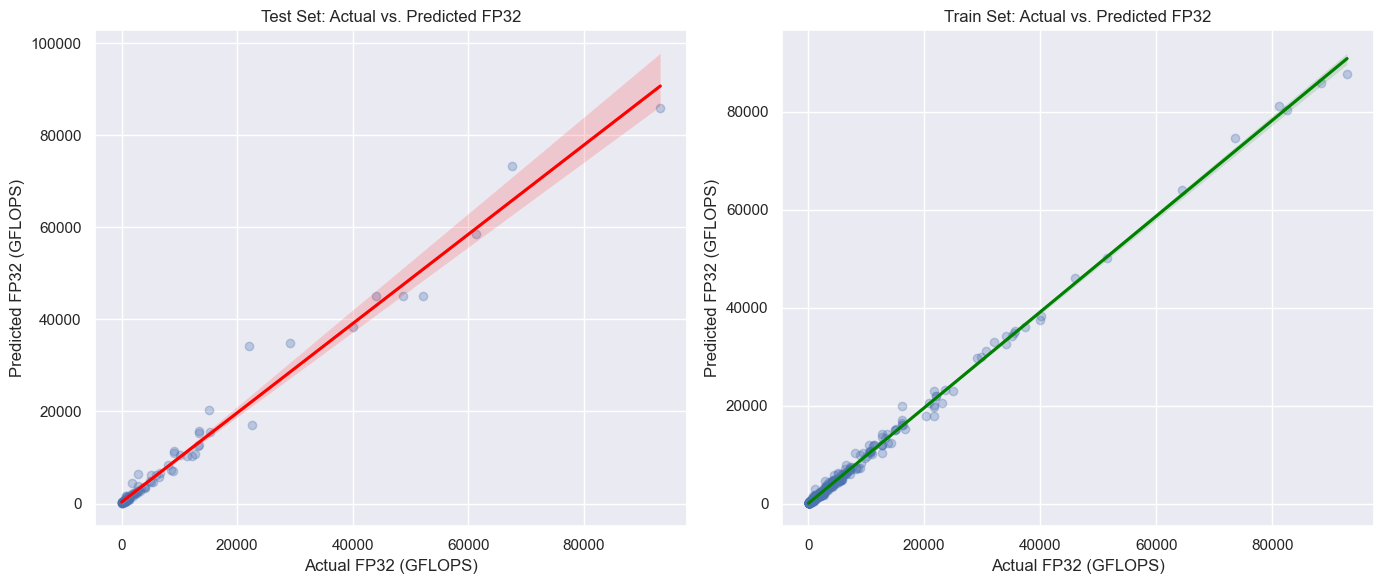

In [406]:
# Visualizing the results with a scatter plot and the line of best fit
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Test Set: Actual vs. Predicted FP32')
plt.xlabel('Actual FP32 (GFLOPS)')
plt.ylabel('Predicted FP32 (GFLOPS)')

plt.subplot(1, 2, 2)
sb.regplot(x=y_train, y=y_train_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Train Set: Actual vs. Predicted FP32')
plt.xlabel('Actual FP32 (GFLOPS)')
plt.ylabel('Predicted FP32 (GFLOPS)')

plt.tight_layout()
plt.show()

### Why XGBoost?

#### Performance Efficiency:

Speed and Scalability: XGBoost is renowned for its execution speed and efficiency. It is optimized to be significantly faster and more efficient in memory usage than standard Gradient Boosting, thanks to its implementation and algorithmic enhancements such as parallel processing and tree pruning.

Handling Large Datasets: XGBoost can handle larger datasets efficiently, which is crucial when dealing with extensive and detailed GPU performance data.

#### Model Accuracy and Robustness:

Regularization: XGBoost includes L1 (Lasso Regression) and L2 (Ridge Regression) regularization which helps prevent overfitting.

Built-in Cross-Validation: XGBoost has an internal cross-validation mechanism at each iteration, allowing it to optimize the performance of the model during training continuously.

#### Handling Sparse Data:

The algorithm is designed to handle sparse data (missing data), which can be common depending on how the datasets are collected and maintained for GPU performance metrics.

#### Tuning Flexibility:

XGBoost offers a variety of parameters that can be finely tuned, such as the depth of trees, learning rate, and number of trees, allowing for extensive customization to improve model performance.

## 3. Gradient Boosting Regression

In [407]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on both the training and test sets
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Calculate RMSE and R² for train set
rmse_train_gb = mean_squared_error(y_train, y_train_pred_gb, squared=False)
r2_train_gb = r2_score(y_train, y_train_pred_gb)

# Calculate RMSE and R² for test set
rmse_test_gb = mean_squared_error(y_test, y_test_pred_gb, squared=False)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

(rmse_train_gb, r2_train_gb), (rmse_test_gb, r2_test_gb)

((545.353463706156, 0.997993580990487),
 (2815.348435470094, 0.9670043649031674))

In [408]:
# Get feature importances from Gradient Boosting model
gb_importances = gb_model.feature_importances_
gb_importance_dict = dict(zip(X_train.columns, gb_importances))
sorted_gb_importance = sorted(gb_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Gradient Boosting Feature Importances:")
for feature, importance in sorted_gb_importance[:15]:  # Top 15 features
    print(f"{feature}: {importance:.4f}")

Gradient Boosting Feature Importances:
Transistors (millions): 0.8941
GPU clock (MHz): 0.0606
Memory Size (MB): 0.0249
Bus Width (bits): 0.0084
Max. TDP (W): 0.0041
Memory clock (MHz): 0.0034
Density (M/mm²): 0.0016
Architecture_RDNA 3.0: 0.0009
Memory Type_GDDR6X: 0.0006
Die Size (mm²): 0.0003
Architecture_Ampere: 0.0003
Gen Year: 0.0002
Architecture_RDNA 2.0: 0.0002
L2 Cache (KB): 0.0001
Process Size (nm): 0.0001


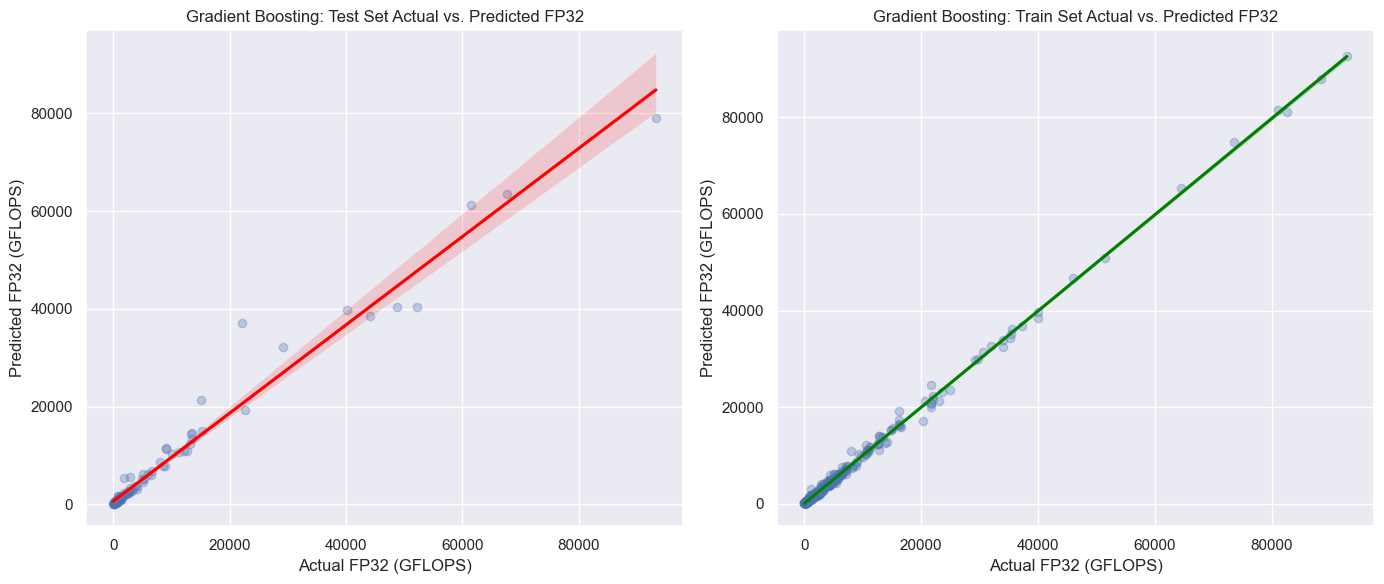

In [409]:
# Visualizing the results with a scatter plot and the line of best fit
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.regplot(x=y_test, y=y_test_pred_gb, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Gradient Boosting: Test Set Actual vs. Predicted FP32')
plt.xlabel('Actual FP32 (GFLOPS)')
plt.ylabel('Predicted FP32 (GFLOPS)')

plt.subplot(1, 2, 2)
sb.regplot(x=y_train, y=y_train_pred_gb, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Gradient Boosting: Train Set Actual vs. Predicted FP32')
plt.xlabel('Actual FP32 (GFLOPS)')
plt.ylabel('Predicted FP32 (GFLOPS)')

plt.tight_layout()
plt.show()

### Why Gradient Boosting Regression?

Sequential Learning & Error Correction: 

Gradient Boosting builds trees one at a time, where each new tree helps to correct errors made by previously trained trees. This sequential correction of residuals can be particularly effective for complex, non-linear relationships that are characteristic of GPU performance data.

Flexibility:

Gradient Boosting can be optimized for different loss functions and provides several options that can be tailored to the specific needs of the regression task, such as minimizing mean squared error for continuous data.

Predictive Power:

The additive model (in which trees are added one at a time) focuses solely on reducing errors, often leading to better predictive accuracy than models that build trees independently.

## Analysis:

Random Forest shows signs of overfitting, evident from the substantial gap between training RMSE (1237.77) and testing RMSE (3009.06). Although it achieves a high R² on training data, its performance drops on testing data, indicating that it might be capturing noise rather than just the underlying pattern.

Random Forest is often praised for its ease of use and interpretability, making it a good starting point or a benchmark model. However, in cases where prediction accuracy on unseen data is paramount, other models might be more appropriate.

XGBoost exhibits a strong balance, with a much smaller gap between training RMSE (683.80) and testing RMSE (2154.71). Its ability to maintain a high R² of 0.9807 on testing data suggests effective generalization, likely due to better regularization techniques that prevent overfitting.

XGBoost has shown robustness not just in this dataset but is generally renowned for its performance in various machine learning competitions. Its strength lies in handling a wide range of data types and distributions, making it a versatile choice for many practical applications.

Gradient Boosting similarly shows a high degree of fitting on training data, with the lowest RMSE (545.35) among the three. However, like Random Forest, there's a notable increase in RMSE when evaluated on testing data (2815.35), hinting at some overfitting but less so than Random Forest.

Gradient Boosting might be preferable in scenarios where the highest possible accuracy on training data is critical, though at the risk of some overfitting.

In summary, while all three models have their strengths and weaknesses, XGBoost emerges as the most balanced choice for this dataset, offering a solid mix of high accuracy and generalization capabilities.

## Data Driven Insight:

Transistors (millions) and GPU Clock (MHz) are consistently rated as the most important features across all models. This highlights that the number of transistors, which correlates with the processing power, and the speed of the GPU are fundamental drivers of GPU performance.

The importance of features like Memory Size, Bus Width, and Memory Clock in some models suggests that not only the processing capabilities but also memory configurations significantly impact GPU performance.

Architectural Features such as Architecture_RDNA 3.0, Architecture_Ampere, and others in the feature importance list indicate that specific architectural innovations or shifts are pivotal in enhancing GPU capabilities.

Implications for GPU Design:

The highlighted importance of transistors and clock speed may inform GPU manufacturers that these areas are critical for consumer perception and actual performance enhancement.

The significant role of memory-related features suggests that innovations in memory technology or configurations can be a key differentiator in the competitive GPU market.

Given the relevance of architectural features, continuous investment in research and development to innovate or improve GPU architectures could lead to better market positioning and product performance.